In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [22]:
# Load the CSV file
file_path = 'Fish.csv'
fish_data = pd.read_csv(file_path)
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [23]:
print(fish_data.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [24]:
# Summary statistics for categorical columns
print(fish_data.describe(include=['object']))

       Species
count      159
unique       7
top      Perch
freq        56


In [25]:
# Check for missing values
print(fish_data.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [26]:
# Drop rows with any missing values
fish_data_cleaned = fish_data.dropna()

# Display basic information after dropping missing values
print(fish_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None


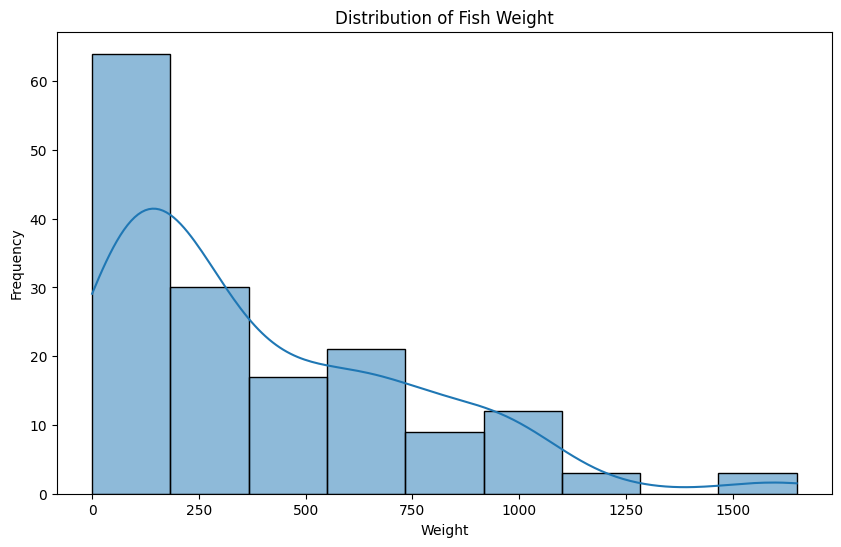

In [27]:
# Distribution plot of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(fish_data_cleaned['Weight'], kde=True)
plt.title('Distribution of Fish Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Encoding categorical features for correlation heatmap
encoded_fish_data = fish_data_cleaned.copy()
for col in encoded_fish_data.select_dtypes(include=['object']).columns:
    encoded_fish_data[col] = encoded_fish_data[col].astype('category').cat.codes

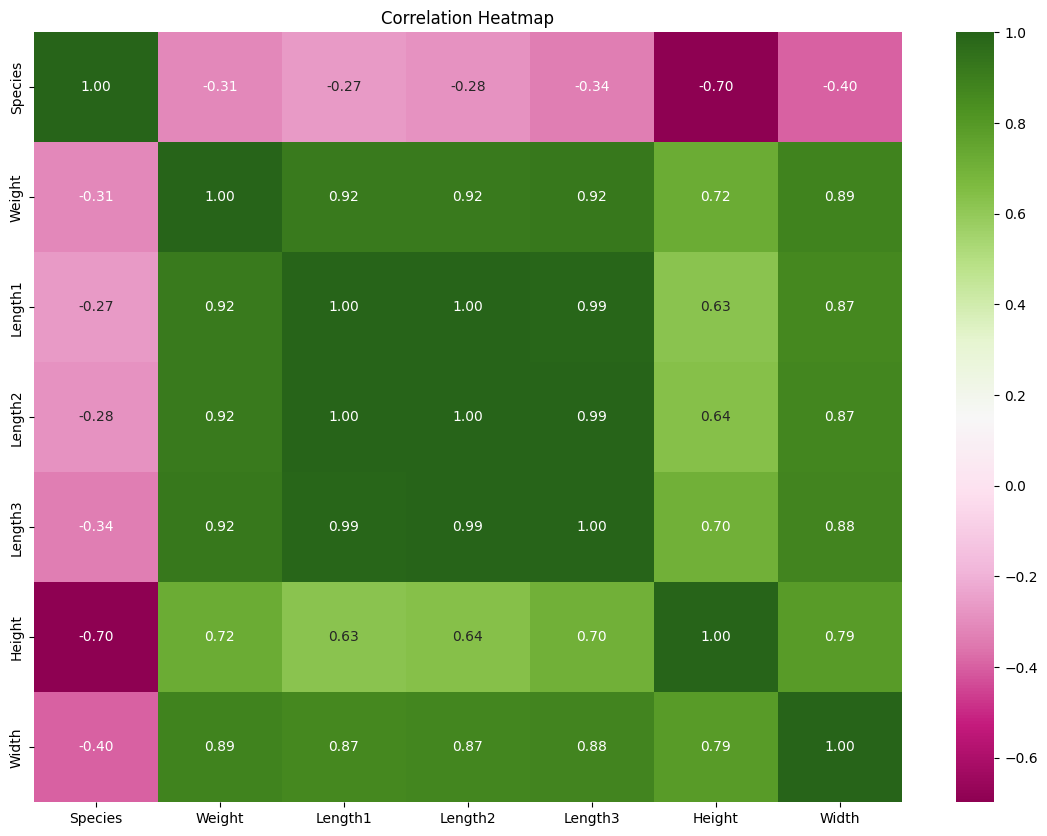

In [29]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(encoded_fish_data.corr(), annot=True, cmap='PiYG', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# Define the feature set (X) and the target variable (y)
X = fish_data_cleaned.drop(columns=['Length2', 'Length3', 'Weight'])
y = fish_data_cleaned['Weight']

In [31]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

In [33]:
# Preprocessing for numerical data: scaling
numerical_transformer = StandardScaler()

In [34]:
# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [35]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [42]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

In [43]:
# Function to evaluate the models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2, predictions

In [44]:
# Create a dictionary to store the results
results = {}
predictions_dict = {}

In [45]:
# Train and evaluate each model
for model_name, model in models.items():
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    mse, r2, predictions = evaluate_model(pipeline, X_test, y_test)
    
    # Store the results
    results[model_name] = {'MSE': mse, 'R^2': r2}
    predictions_dict[model_name] = predictions

# Display the results
results

{'Linear Regression': {'MSE': 8431.409369505498, 'R^2': 0.9407237651632034},
 'Ridge Regression': {'MSE': 7724.032013749832, 'R^2': 0.9456969154896078},
 'Lasso Regression': {'MSE': 8059.360778255269, 'R^2': 0.9433394179798501}}

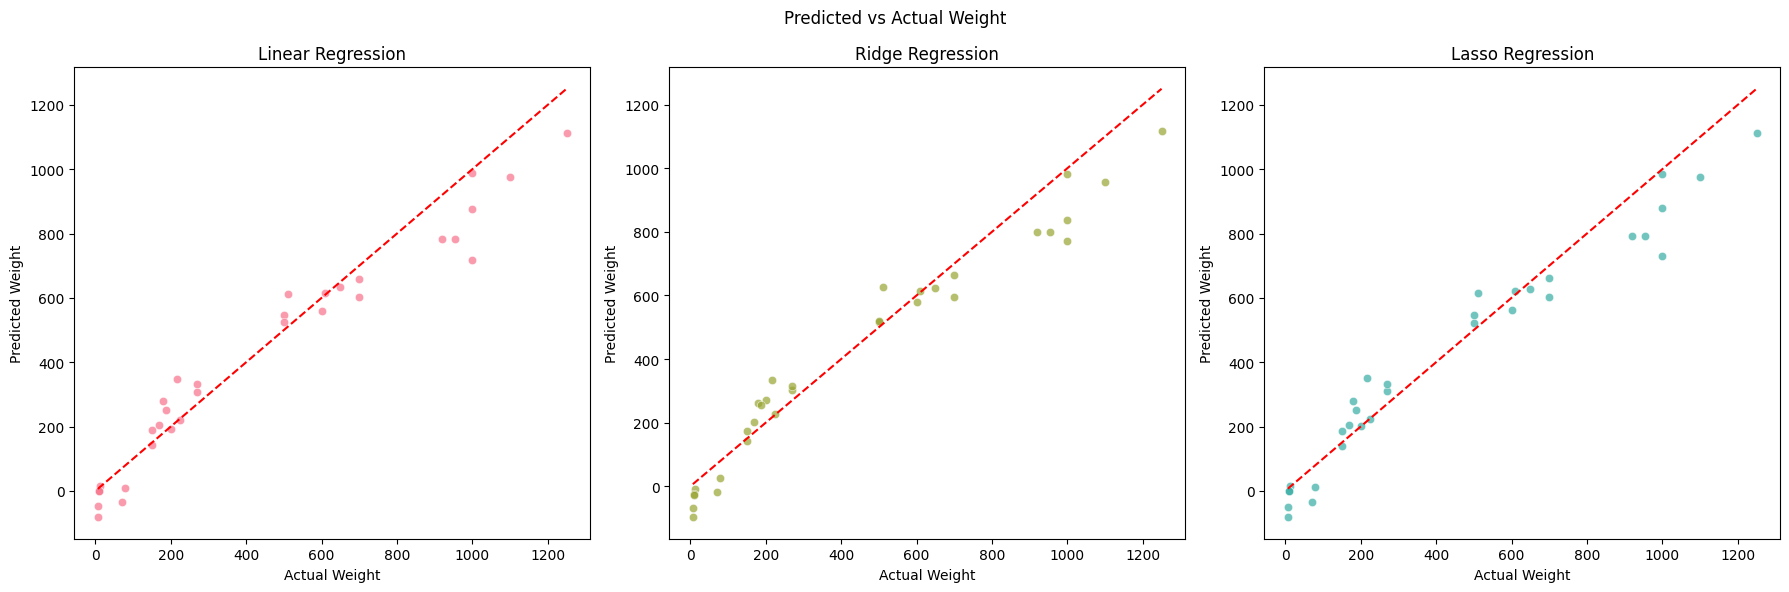

In [46]:
# Visualization: Distribution of predicted vs actual weight
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Predicted vs Actual Weight')

palette = sns.color_palette("husl", 4)

for i, (model_name, predictions) in enumerate(predictions_dict.items()):
    sns.scatterplot(x=y_test, y=predictions, ax=axes[i], alpha=0.7, color=palette[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Actual Weight')
    axes[i].set_ylabel('Predicted Weight')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.tight_layout()
plt.show()